
<h1 align="center"><font size="5">Project: Titanic Machine Learning from Disaster</font></h1>
<h2 align="center"><font size="5">Deadline: </font></h2>
<h3 align="center"><font size="5"> Total marks: </font></h3>

In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
import seaborn as sns
import scipy
from geolite2 import geolite2
import ipaddress
%matplotlib inline

### About dataset

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

__The training set__ should be used to build your machine learning models. For the training set, we provide the outcome (also known as the “ground truth”) for each passenger. Your model will be based on “features” like passengers’ gender and class. You can also use feature engineering to create new features.

__The test set__ should be used to see how well your model performs on unseen data. For the test set, we do not provide the ground truth for each passenger. It is your job to predict these outcomes. For each passenger in the test set, use the model you trained to predict whether or not they survived the sinking of the Titanic.

We also include gender_submission.csv, a set of predictions that assume all and only female passengers survive, as an example of what a submission file should look like.



| Field          | Description                                                                                          |
|----------------|------------------------------------------------------------------------------------------------------|
| survival       | Survival 0 = No, 1 = Yes                                                                             |
| pclass         | Ticket class. 1 = 1st, 2 = 2nd, 3 = 3rd                                                              |
| sex            | Sex                                                                                                  |
| Age            | Age in years                                                                                         |
| sibsp          | # of siblings / spouses aboard the Titanic                                                           |
| parch          | # of parents / children aboard the Titanic                                                           |
| ticket         | Ticket number                                                                                        |
| fare           | Passenger fare                                                                                       |
| cabin          | Cabin number                                                                                         |
| embarked       | Port of Embarkation. C = Cherbourg, Q = Queenstown, S = Southampton                                  |        

# 1. Data Exploration

### *** To predict "what sorts of people were more likely to survive?", we need some fields: ' name', ' , age', 'sex ', 'fare', 'Pclass ' 
### The first things we need to do:
- Identify Variables 
- Univariate Analysis    
- Bi-variate Analysis
- Handle the Missing Values
- Handle Outlier Values

### 1.1 Load Data From CSV File  

In [2]:
# Read CSV file: loan_train.csv
data_train = pd.read_csv('train.csv')

In [3]:
# Understanding to dataset
# Shape
data_train.shape

(891, 12)

In [4]:
# head()
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# tail
data_train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [6]:
# info
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [7]:
data_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
# describe()
data_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### 1.4 Data exploration

#### 1.4.1 Determin attributive variable

1. Input: <> survival
2. Output: survival
3. Type of variable:
    + Pridictor: <> survival
    + Target: survival
4. Numerical variable
    + age
    + fare
5. Categorical variable :
    + PassengerId
    + Survived
    + Pclass
    + SibSp 
    + Parch
    + country
    + Name
    + Sex
    + Ticket
    + Cabin
    + Embarked

In [9]:
# Check types of variable
# Numeric variable
number = [f for f in data_train.columns if data_train.dtypes[f] != 'object']
number

['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [10]:
# Object variable
objects = [f for f in data_train.columns if data_train.dtypes[f] == 'object']
objects

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

In [11]:
# Determine the number of different value of variable
# Numeric variable
i = 1
for obj in number:
    print(i,'/',obj,'\t',len(data_train[obj].unique()),':',data_train[obj].unique()) 
    i = i + 1

1 / PassengerId 	 891 : [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 24

In [12]:
# Categorical variable
i = 1
for obj in objects:
    print(i,'/',obj,'\t',len(data_train[obj].unique()),':',data_train[obj].unique()) 
    i = i + 1

1 / Name 	 891 : ['Braund, Mr. Owen Harris'
 'Cumings, Mrs. John Bradley (Florence Briggs Thayer)'
 'Heikkinen, Miss. Laina' 'Futrelle, Mrs. Jacques Heath (Lily May Peel)'
 'Allen, Mr. William Henry' 'Moran, Mr. James' 'McCarthy, Mr. Timothy J'
 'Palsson, Master. Gosta Leonard'
 'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)'
 'Nasser, Mrs. Nicholas (Adele Achem)' 'Sandstrom, Miss. Marguerite Rut'
 'Bonnell, Miss. Elizabeth' 'Saundercock, Mr. William Henry'
 'Andersson, Mr. Anders Johan' 'Vestrom, Miss. Hulda Amanda Adolfina'
 'Hewlett, Mrs. (Mary D Kingcome) ' 'Rice, Master. Eugene'
 'Williams, Mr. Charles Eugene'
 'Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)'
 'Masselmani, Mrs. Fatima' 'Fynney, Mr. Joseph J' 'Beesley, Mr. Lawrence'
 'McGowan, Miss. Anna "Annie"' 'Sloper, Mr. William Thompson'
 'Palsson, Miss. Torborg Danira'
 'Asplund, Mrs. Carl Oscar (Selma Augusta Emilia Johansson)'
 'Emir, Mr. Farred Chehab' 'Fortune, Mr. Charles Alexander'
 'O\'Dwyer, Miss. Ellen 

In [14]:
# Are there multiple lines with the same PassengerId ?
print("The user_id column includes {} duplicates".format(data_train.duplicated(subset = "PassengerId", keep =False).sum()))

The user_id column includes 0 duplicates


In [30]:
# Missing values
def mis_data(df):
    total = df.isnull().sum().sort_values(ascending = False)
    percent = round(total/len(df)*100,2)
    return pd.concat([total,percent], axis = 1, keys = ['Total','Percent'])

In [31]:
mis_data_stat = mis_data(data_train)
print(mis_data_stat[0:10])

          Total  Percent
Cabin       687    77.10
Age         177    19.87
Embarked      2     0.22
Fare          0     0.00
Ticket        0     0.00
Parch         0     0.00
SibSp         0     0.00
Sex           0     0.00
Name          0     0.00
Pclass        0     0.00


### There are some variables which have Nan values:
+ Age 
+ Cabin
+ Embarked

### 1.5 Handle the Missing Values and Outlier Values

In [32]:
# Age-> fill
# Cabin - dropout
# Embarked - dropout 2 line

In [33]:
data_train.mean()

PassengerId    446.000000
Survived         0.383838
Pclass           2.308642
Age             29.699118
SibSp            0.523008
Parch            0.381594
Fare            32.204208
dtype: float64

In [34]:
# Fill in Nan values by age.mean
data_train = data_train.fillna(data_train.mean())

In [36]:
# Delete 'cabin' column
del data_train['Cabin']

In [37]:
# Dropout nan vlaues
data_train = data_train.dropna()

### 1.5 Univariate Analysis

### Numerical variable

In [38]:
# Age
data_train['Age'].describe(include = 'all')

count    889.000000
mean      29.653446
std       12.968366
min        0.420000
25%       22.000000
50%       29.699118
75%       35.000000
max       80.000000
Name: Age, dtype: float64

In [39]:
age_median = data_train.Age.median()
age_median

29.69911764705882

In [40]:
age_mode = data_train.Age.mode()
age_mode

0    29.699118
dtype: float64

In [41]:
# check min, max co thuoc (mean - 3*std, mean + 3*std) or mean co thuoc 10% median
data_train.Age.mean()-3*data_train.Age.std(), data_train.Age.mean()+3*data_train.Age.std()  

(-9.25165255708271, 68.55854529843121)

In [42]:
# Q1,Q3
Q1_age = np.percentile(data_train.Age,25)
Q3_age = np.percentile(data_train.Age,75)
Q1_age, Q3_age

(22.0, 35.0)

In [43]:
age_iqr = scipy.stats.iqr(data_train.Age)
age_iqr

13.0

In [44]:
age_var = data_train.Age.var()
age_var

168.1785247309506

In [45]:
age_std = data_train.Age.std()
age_std

12.96836630925232

In [46]:
age_skew = data_train.Age.skew()
age_skew
# Phân phối lệch phải rất ít

0.43172026491227716

In [47]:
scipy.stats.skew(data_train.Age)

0.4309914863386608

In [48]:
prin_kur = data_train.Age.kurtosis()
prin_kur
# Phân phối nhọn hơn phân phối chuẩn

0.9790065453677568

c:\python\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


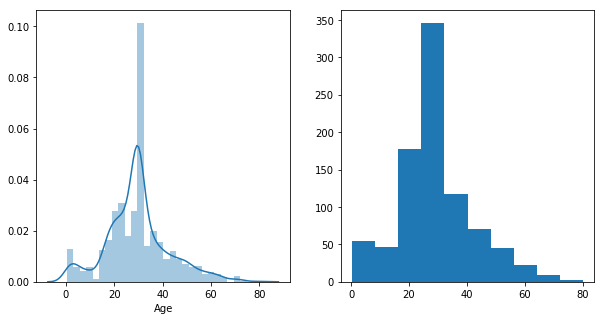

In [49]:
# Visuallization
# Histogram
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
sns.distplot(data_train.Age)
plt.subplot(1,2,2)
plt.hist(data_train.Age)
plt.show()

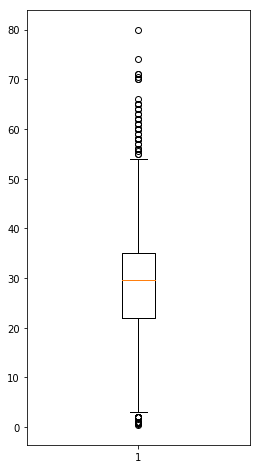

In [50]:
# Boxplot
plt.figure(figsize=(4,8))
plt.boxplot(data_train.Age)
plt.show()

In [52]:
# number of upper outliers
n_o_upper = data_train[data_train.Age > (Q3_age+1.3* age_iqr)].shape[0]
n_o_upper

56

In [53]:
# Percentage od outliers
outlier_per_age = n_o_upper/data_train.shape[0]
outlier_per_age

0.06299212598425197

In [55]:
from scipy.stats import zscore
data_train["age_zscore"] = zscore(data_train["Age"])
data_train["is_outlier"] = data_train["age_zscore"].apply(lambda x: x <= -3 or x >= 3)
data_train[data_train["is_outlier"]]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,age_zscore,is_outlier
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,C,3.190057,True
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,Q,3.151480,True
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,C,3.190057,True
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,S,3.884444,True
672,673,0,2,"Mitchell, Mr. Henry Michael",male,70.0,0,0,C.A. 24580,10.5000,S,3.112903,True
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0000,S,3.112903,True
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,S,3.421519,True


In [57]:
data_train.Age.shape[0]

889

In [58]:
def removeOutliers(x, outlierConstant):
    a = np.array(x)
    upper_quartile = np.percentile(a, 75)
    lower_quartile = np.percentile(a, 25)
    IQR = (upper_quartile - lower_quartile) * outlierConstant
    quartileSet = (lower_quartile - IQR, upper_quartile + IQR)
    
    result = a[np.where((a >= quartileSet[0]) & (a <= quartileSet[1]))]
    return result.tolist()

In [60]:
len(removeOutliers(data_train.Age,1.5))

824

In [ ]:
def remove_outliers(col):
    Q1, Q3 = col.quantile([0.25, 0.75])
    IQR = Q3 - Q1
    oa = Q3 +  1.37*IQR
    ob = Q1 -  1.37*IQR
    return col[(col > ob) & (col < oa)]

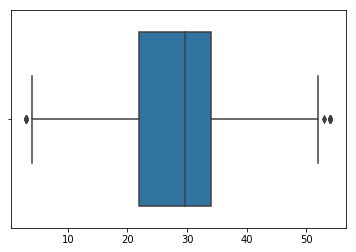

In [61]:
age_clean = removeOutliers(data_train.Age, 1.5)
sns.boxplot(age_clean)